# 1
A particle is represented by the wave function
$
\begin{equation*}
\psi (x)=\begin{cases}
\frac{Ax}{a} & 0\leq x\leq a\\
\frac{A( b-x)}{b-a} & a\leq x\leq b\\
0 & \text{otherwise}
\end{cases}
\end{equation*}
$
where $A, a \text{ and } b$ are constants.


A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)
B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)
C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)
D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)
E. What is the probability of finding the particle to the left of $a$? (434: 3 pts, 591: 2 pts)
F. Calculate the expectation values of $x$ and $x_2$ (434: 12 pts, 591: 8 pts)

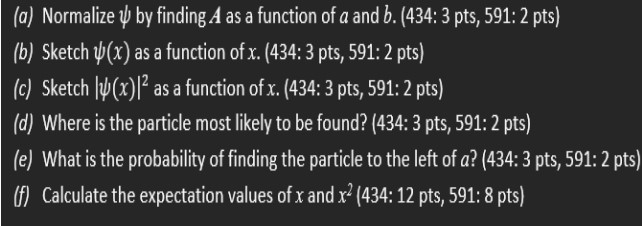

A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)


In [244]:
from sympy import symbols, integrate, solve
from IPython.display import display, Math

A, a, b, x = symbols('A a b x', real = True,  conds = 'none')

psi1 = A*x/a
psi2 = A*(b-x)/(b-a)

total_probability = integrate(psi1 ** 2, (x, 0, a)) + integrate(psi2 ** 2, (x, a, b))

A = solve(total_probability - 1, A)[1]

display(Math(f'A = {A} = \sqrt{{ \\frac{{3}}{{b}} }}'))


<IPython.core.display.Math object>

B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)


In [240]:
import numpy as np
import plotly.express as px
from pandas import DataFrame

#choose arbitrary constant values for a and b

def Psi(x, a, b):
  A = (3/b)**0.5
  if (0 <= x) & (x < a):
    psi = A*x/a
  elif (a <= x) & (x <= b):
    psi = A*(b-x)/(b-a)
  else:
    psi = 0
  return psi


def plot_psi(a, b):
    x = np.linspace(-1, b+2, num = 10000)
    psi_array = []
    for i in x:
      psi_array.append(Psi(i, a, b))

    psi_df = DataFrame({'x': x, 'psi': psi_array})
    px.line(psi_df, x = 'x', y = 'psi').show()
    return(psi_df)

psi_df = plot_psi(a = 0.01, b = 3)


C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)


In [241]:
psi_squared_df = psi_df.copy().rename(columns = {'psi':'psi^2'})
psi_squared_df['psi^2'] *= psi_squared_df['psi^2']

px.line(psi_squared_df, x = 'x', y = 'psi^2')

In [79]:
#double check that integral of PDF is 1
round(np.trapz(psi_squared_df['psi^2'], psi_squared_df['x']), 4)

1.0

D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)

As can be seen from the plots from parts B and C, the peak of both $\psi$ and $\psi^2$ is at $x = a$.

E. What is the probability of finding the particle to the left of $a$? (434: 3 pts, 591: 2 pts)

This is simply the integral of $\psi^2$ when $x<a$:

In [254]:
#update definition of psi1 to include modified defintion of  A
psi1 = A*x/a

print("P(x < a) =", integrate(psi1 ** 2, (x, 0, a)))


P(x < a) = a/b


F. Calculate the expectation values of $x$ and $x_2$ (434: 12 pts, 591: 8 pts)


In [ ]:
psi2 = A*(b-x)/(b-a)

psi = psi1 + psi2

print('E(x) =', integrate())